# Solución numérica para el problema del edificio con sismo

In [17]:
import math 
import numpy as np
import matplotlib.pyplot as plt

## Parametros

In [18]:
# Constantes del problema
g = 9.81
m = 1.0
k = 18.0
h = 1.0
l = 2.0
pi = math.pi

## Implementación de la solución numérica

In [129]:
# Resuelve la ecuación diferencial por el método de Euler
def euler_solve(A, omega, tMax, div):
    # Tamaño del paso en el tiempo
    deltaT = tMax / div
    
    # Crea las listas donde se almacena la solución
    t = np.linspace(0, tMax, div)
    eventTime = tMax
    theta1 = np.zeros_like(t)
    theta2 = np.zeros_like(t)
    
    # Condiciones iniciales
    theta1[0] = 0.0
    theta2[0] = 0.0
    theta1Prime = 0.0
    theta2Prime = 0.0
    theta1BiPrime = 0.0
    theta2BiPrime = 0.0
    
    for i in range(1,div):
        theta1BiPrime = -(k*theta1[i-1] + h*m*(2*A*math.pow(omega, 2.0)*math.cos(theta1[i-1])*math.sin(t[i-1]*omega) - 2*g*math.sin(theta1[i-1]) + h*math.sin(theta1[i-1] - theta2[i-1])*math.pow(theta2[i-1], 2.0) + h*math.cos(theta1[i-1] - theta2[i-1])*theta2BiPrime)) / (2*math.pow(h, 2.0)*m)
        theta2BiPrime = (-k*theta2[i-1] + h*m*(-A*math.pow(omega, 2.0)*math.cos(theta2[i-1])*math.sin(t[i-1]*omega) + g*math.sin(theta2[i-1]) + h*math.sin(theta1[i-1] - theta2[i-1])*math.pow(theta1Prime, 2.0) - h*math.cos(theta1[i-1] - theta2[i-1])*theta1BiPrime)) / (math.pow(h, 2.0)*m)
        theta1Prime += theta1BiPrime * deltaT
        theta2Prime += theta2BiPrime * deltaT
        theta1[i] = theta1[i-1] + theta1Prime * deltaT
        theta2[i] = theta2[i-1] + theta2Prime * deltaT
        
        if math.fabs(theta1[i]) > pi/2 or math.fabs(theta2[i]) > pi/2:
            eventTime = t[i]
            t = t[1:i]
            theta1 = theta1[1:i]
            theta2 = theta2[1:i]
            break
        
    return t, theta1, theta2, eventTime

In [130]:
(t, theta1, theta2, eventTime) = euler_solve(0.5, 1.0, 10.0, 500)

## Gráficas

### De las variables

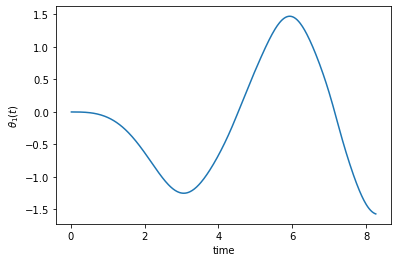

In [131]:
# theta1 vs t
plt.plot(t,theta1)
plt.xlabel('time')
plt.ylabel(r'$\theta_1(t)$')
plt.show()

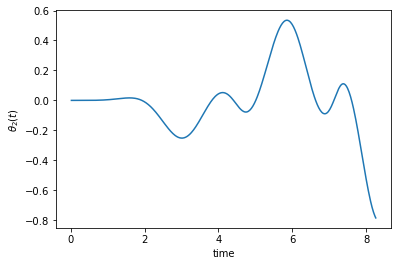

In [132]:
# theta2 vs t
plt.plot(t,theta2)
plt.xlabel('time')
plt.ylabel(r'$\theta_2(t)$')
plt.show()

### Mapa de estabilidad

In [145]:
AMin = 0.1
AMax = 3.0
omegaMin = 0.1
omegaMax = 4.0
paramDelta = 0.1
horizontalRows = math.floor((AMax - AMin) / paramDelta);
verticalRows = math.floor((omegaMax - omegaMin) / paramDelta);

canvas = np.zeros([verticalRows+1, horizontalRows+1])

In [148]:
i = 0
for A in np.arange(AMin, AMax, paramDelta):
    j = 0
    for omega in np.arange(omegaMin, omegaMax, paramDelta):
        (t, theta1, theta2, eventTime) = euler_solve(A, omega, 10.0, 1000)
        canvas[verticalRows-j][i] = eventTime
        j += 1
    i += 1

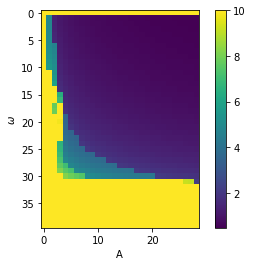

In [150]:
plt.imshow(canvas)
plt.colorbar()
plt.xlabel('A')
plt.ylabel(r'$\omega$')
plt.show()